# Project Title: Heart Disease Prediction
## Short Description:
- Heart diseases are one of the leading causes of death globally. People with heart disease or who are at high risk of heart disease need early intervention to prevent future undesirable outcomes. In this project, we are going to use a dataset that contains 11 features considered vital in identifying people with heart disease, and we are going to test it with four machine learning models— *KNN, Decision Tree, Random Forest, and Naive Bayes*— that will predict the likelihood of a person having heart disease.

## About the dataset
### Information about the features
1. **Age:** *(years)*
   - patient's age
2. **Sex:** *(M: Male, F: Female)*
   - patient's sex
3. **ChestPainType:** *(TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)*
   - type of patient's chest pain
4. **RestingBP:** *(mm Hg)*
   - resting blood pressure
5. **Cholesterol:** *(mm/dl)*
   - serum cholesterol
6. **FastingBS:** *(1: if FastingBS > 120 mg/dl, 0: otherwise)*
   - fasting blood sugar
7. **RestingECG:** *[Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]*
   - resting electrocardiogram results
8. **MaxHR:** *(Numeric value between 60 and 202)*
   - maximum heart rate achieved
9.  **ExerciseAngina:** *(Y: Yes, N: No)*
    - exercise-induced angina
10. **Oldpeak:** *(Numeric value measured in depression)*
    - oldpeak = ST 
    - ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline
11. **ST_Slope:** *(Up: upsloping, Flat: flat, Down: downsloping)*
    - the slope of the peak exercise ST segment
12. **HeartDisease:** *(1: Heart disease, 0: Normal)*
    - target output


### Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

Total: 1190 observations

Duplicated: 272 observations

**Final dataset: 918 observations**

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/dataset/45/heart+disease


### Citation
> fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.


### Acknowledgements
**Creators:**
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

**Donor:**
- David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

## Step 1: Import the libaries

In [2]:
# Basic necessities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Models and preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Added this import to suppress the annoying warning messages that keeps on appearing in Step 4. The program still works though.
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

## Step 2: Exploring the Dataset
- Covers the loading of the dataset and summary of the dataset.

In [3]:
df = pd.read_csv('./dataset.csv')

# First 5 records of the dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Last 5 records of the dataset
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
# Number of records and columns the dataset contains
df.shape   # (records, columns)

(918, 12)

In [6]:
# Basic information about the dataset
# Shows the total number of rows and columns, each attribute's type, and the number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# Summary statistics of the numeric attributes
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- Looking at the statistics summary of the numeric attributes, we noticed an unusual value. The lowest value in the RestingBP is 0.
- Now, we are not adept in medical field, but we sure know that Blood Pressure can not be that low. We are going to do something about that later in the data preprocessing step.

In [8]:
# Number of null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
# Number of duplicate values
df.duplicated().sum()

0

## Step 3: Data Preprocessing

In [10]:
# Separating the numeric and non-numeric attributes
cat_df = df.select_dtypes(include=object)
num_df = df.select_dtypes(exclude=object)

In [11]:
cat_df

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [12]:
num_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [13]:
num_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- As we can see, the attribute that has an unusual value here is the RestingBP. Let's look at the record(s) with 0 value.

In [14]:
num_df[num_df["RestingBP"]==0]

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
449,55,0,0,0,155,1.5,1


- Fortunately, there is only one record with 0 RestingBP. Dropping this record will not have a significant impact on the overall performance of the machine learning algorithm. So we're just going to drop it.

In [15]:
# We set inplace to True to overwrite the current dataframe
num_df.drop(index=num_df[num_df["RestingBP"]==0].index, inplace=True)

num_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [16]:
display(cat_df)

cat_df.shape

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


(918, 5)

- Next is converting these non-numerical (categorical) attributes to numeric.

In [17]:
encoder = LabelEncoder()

for i in range(0, cat_df.shape[1]):
    cat_df.iloc[:,i] = encoder.fit_transform(cat_df.iloc[:,i])

cat_df

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2
...,...,...,...,...,...
913,1,3,1,0,1
914,1,0,1,0,1
915,1,0,1,1,1
916,0,1,0,0,1


In [18]:
# Finalizing the dataset

final_df = pd.concat([cat_df, num_df], axis=1)

final_df

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40.0,140.0,289.0,0.0,172.0,0.0,0.0
1,0,2,1,0,1,49.0,160.0,180.0,0.0,156.0,1.0,1.0
2,1,1,2,0,2,37.0,130.0,283.0,0.0,98.0,0.0,0.0
3,0,0,1,1,1,48.0,138.0,214.0,0.0,108.0,1.5,1.0
4,1,2,1,0,2,54.0,150.0,195.0,0.0,122.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,3,1,0,1,45.0,110.0,264.0,0.0,132.0,1.2,1.0
914,1,0,1,0,1,68.0,144.0,193.0,1.0,141.0,3.4,1.0
915,1,0,1,1,1,57.0,130.0,131.0,0.0,115.0,1.2,1.0
916,0,1,0,0,1,57.0,130.0,236.0,0.0,174.0,0.0,1.0


- This will be the final dataset. But since we deleted a record in the numeric dataframe earlier, we're expecting null values. We're just going to simply drop those null values.

In [19]:
final_df.isnull().sum()

Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
Age               1
RestingBP         1
Cholesterol       1
FastingBS         1
MaxHR             1
Oldpeak           1
HeartDisease      1
dtype: int64

In [20]:
final_df = final_df.dropna()

final_df.isnull().sum()

Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
Age               0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHR             0
Oldpeak           0
HeartDisease      0
dtype: int64

In [21]:
final_df

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40.0,140.0,289.0,0.0,172.0,0.0,0.0
1,0,2,1,0,1,49.0,160.0,180.0,0.0,156.0,1.0,1.0
2,1,1,2,0,2,37.0,130.0,283.0,0.0,98.0,0.0,0.0
3,0,0,1,1,1,48.0,138.0,214.0,0.0,108.0,1.5,1.0
4,1,2,1,0,2,54.0,150.0,195.0,0.0,122.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,3,1,0,1,45.0,110.0,264.0,0.0,132.0,1.2,1.0
914,1,0,1,0,1,68.0,144.0,193.0,1.0,141.0,3.4,1.0
915,1,0,1,1,1,57.0,130.0,131.0,0.0,115.0,1.2,1.0
916,0,1,0,0,1,57.0,130.0,236.0,0.0,174.0,0.0,1.0


- Final look of our data.

## Step 4: Exploratory Data Analysis

- Involves the data visualizations. 
- Our main objective here is to visualize the data in order to identify patterns and relatonships between the variables.

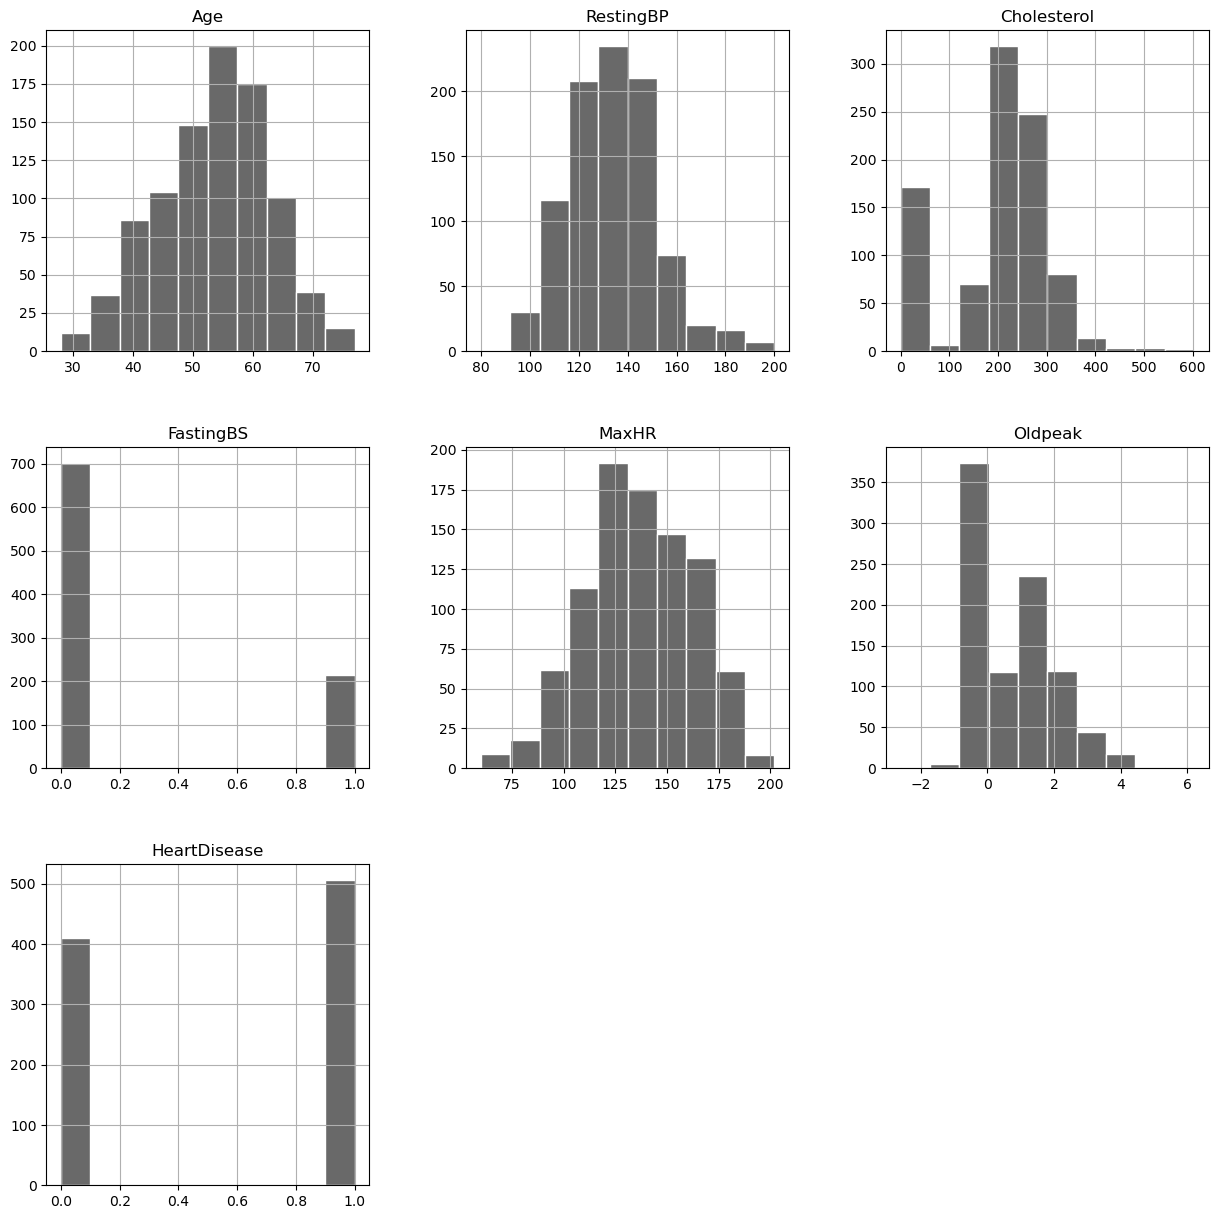

In [22]:
X = final_df.iloc[:, 0:11]
Y = final_df.iloc[:, -1]    # Target output

final_df.hist(figsize=(15, 15), color='dimgray', edgecolor='white')
plt.show()

- We started with **histograms** to visualize the distribution of the numerical attributes.
- As we can see, cholesterol and Oldpeak were non-normally distributed. I don't know how to deal with that, so I'm going to leave it for now.

<Axes: >

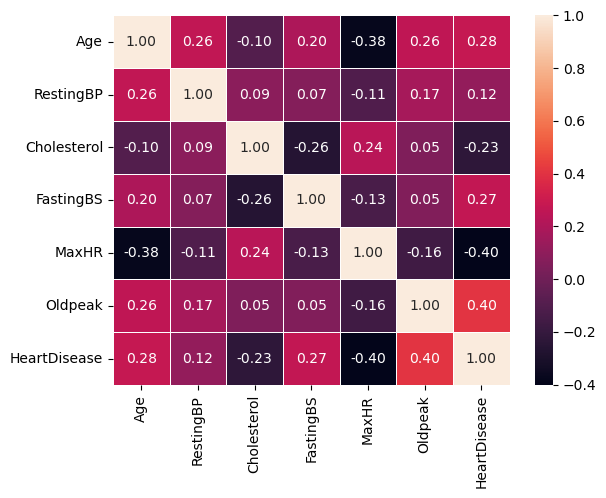

In [23]:
correlation = num_df.corr()

sn.heatmap(correlation, annot=True, linewidths=0.5, fmt='.2f')

**QUICK GUIDE:** The closer the value to 1, the greater the correlation.
- We used heatmaps to understand relationships between numerical attributes.
- No strong correlation between the variables are observed.

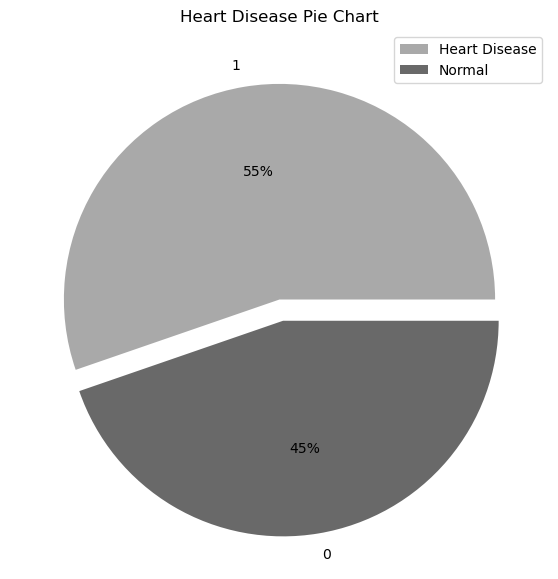

In [24]:
hd_count = Y.value_counts()

plt.figure(figsize=(7,7))
plt.pie(hd_count, labels=[1, 0], autopct='%.0f%%', explode=(0, 0.1), colors=['darkgray','dimgray'])
plt.legend(['Heart Disease', 'Normal'], loc='best')
plt.title("Heart Disease Pie Chart")
plt.show()

- As we can see, the dataset is balanced.

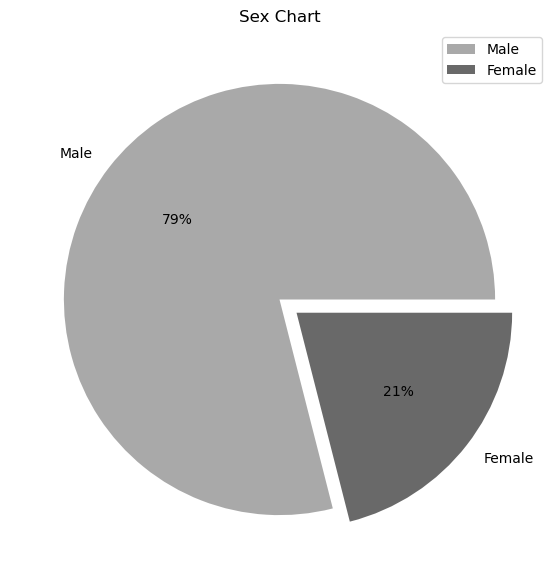

In [25]:
s_count = cat_df['Sex'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(s_count, labels=['Male', 'Female'], autopct='%.0f%%', explode=(0, 0.1), colors=['darkgray','dimgray'])
plt.legend(['Male', 'Female'], loc='best')
plt.title("Sex Chart")
plt.show()

- The dataset is male-dominated.

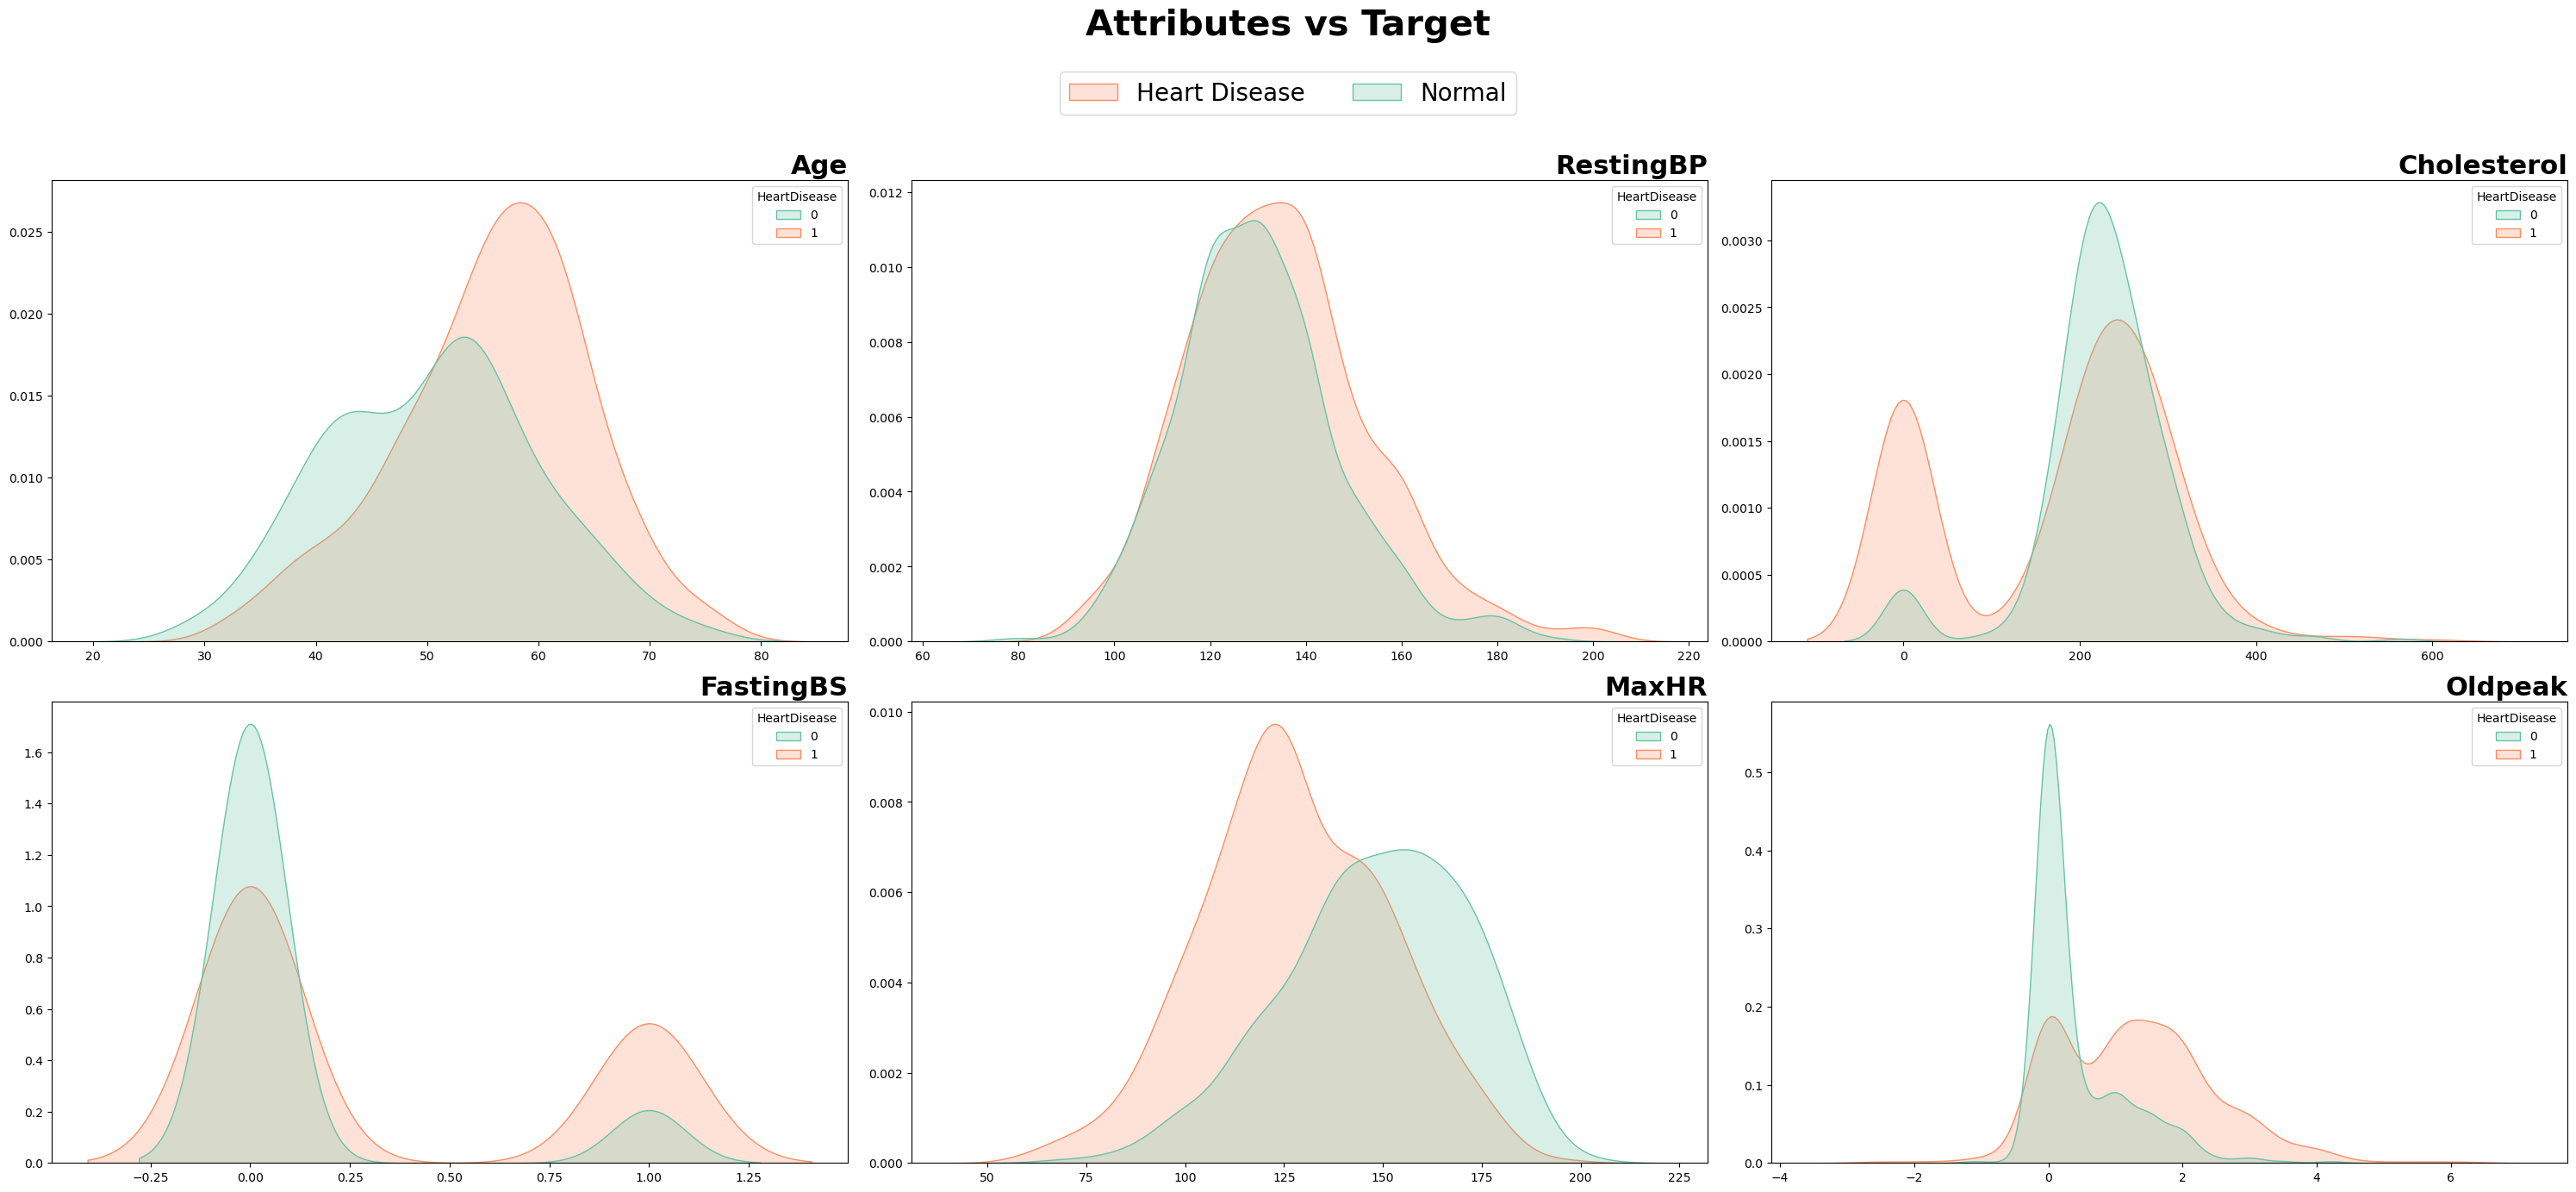

In [118]:
# Data frame of the numerical attributes without the target output (Heart Disease)
num_att_df = num_df.drop('HeartDisease', axis=1)

figsize = (30, 20)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(num_att_df[:]):
    ax = plt.subplot(3,3, idx+1)
    sn.kdeplot(data=num_df, hue='HeartDisease', fill=True, x=col, palette='Set2', legend=True)
    
    ax.set_title(f'{col}', loc='right',weight='bold', fontsize=22)
    ax.set_ylabel('') 
    ax.set_xlabel('')

fig.suptitle('Attributes vs Target\n\n\n', ha='center',  fontweight='bold', fontsize=30)
fig.legend(['Heart Disease','Normal'], loc='upper center', bbox_to_anchor=(0.5, 0.95), fontsize=20, ncol=2)
plt.tight_layout()
plt.show()

**Noticeable Patterns:**
- The older the person, the more likely to have heart disease.
- People with FastingBS < 120 mg/dl (0 FastingBS) are less likely to have heart disease.
- The maximum heart rate of individuals with heart disease appears to be higher, which is unexpected because people with heart disease are expected to have weaker heart. We will conduct a closer examination about this later on.
- People with 0 Oldpeak are less likely to have heart disease.

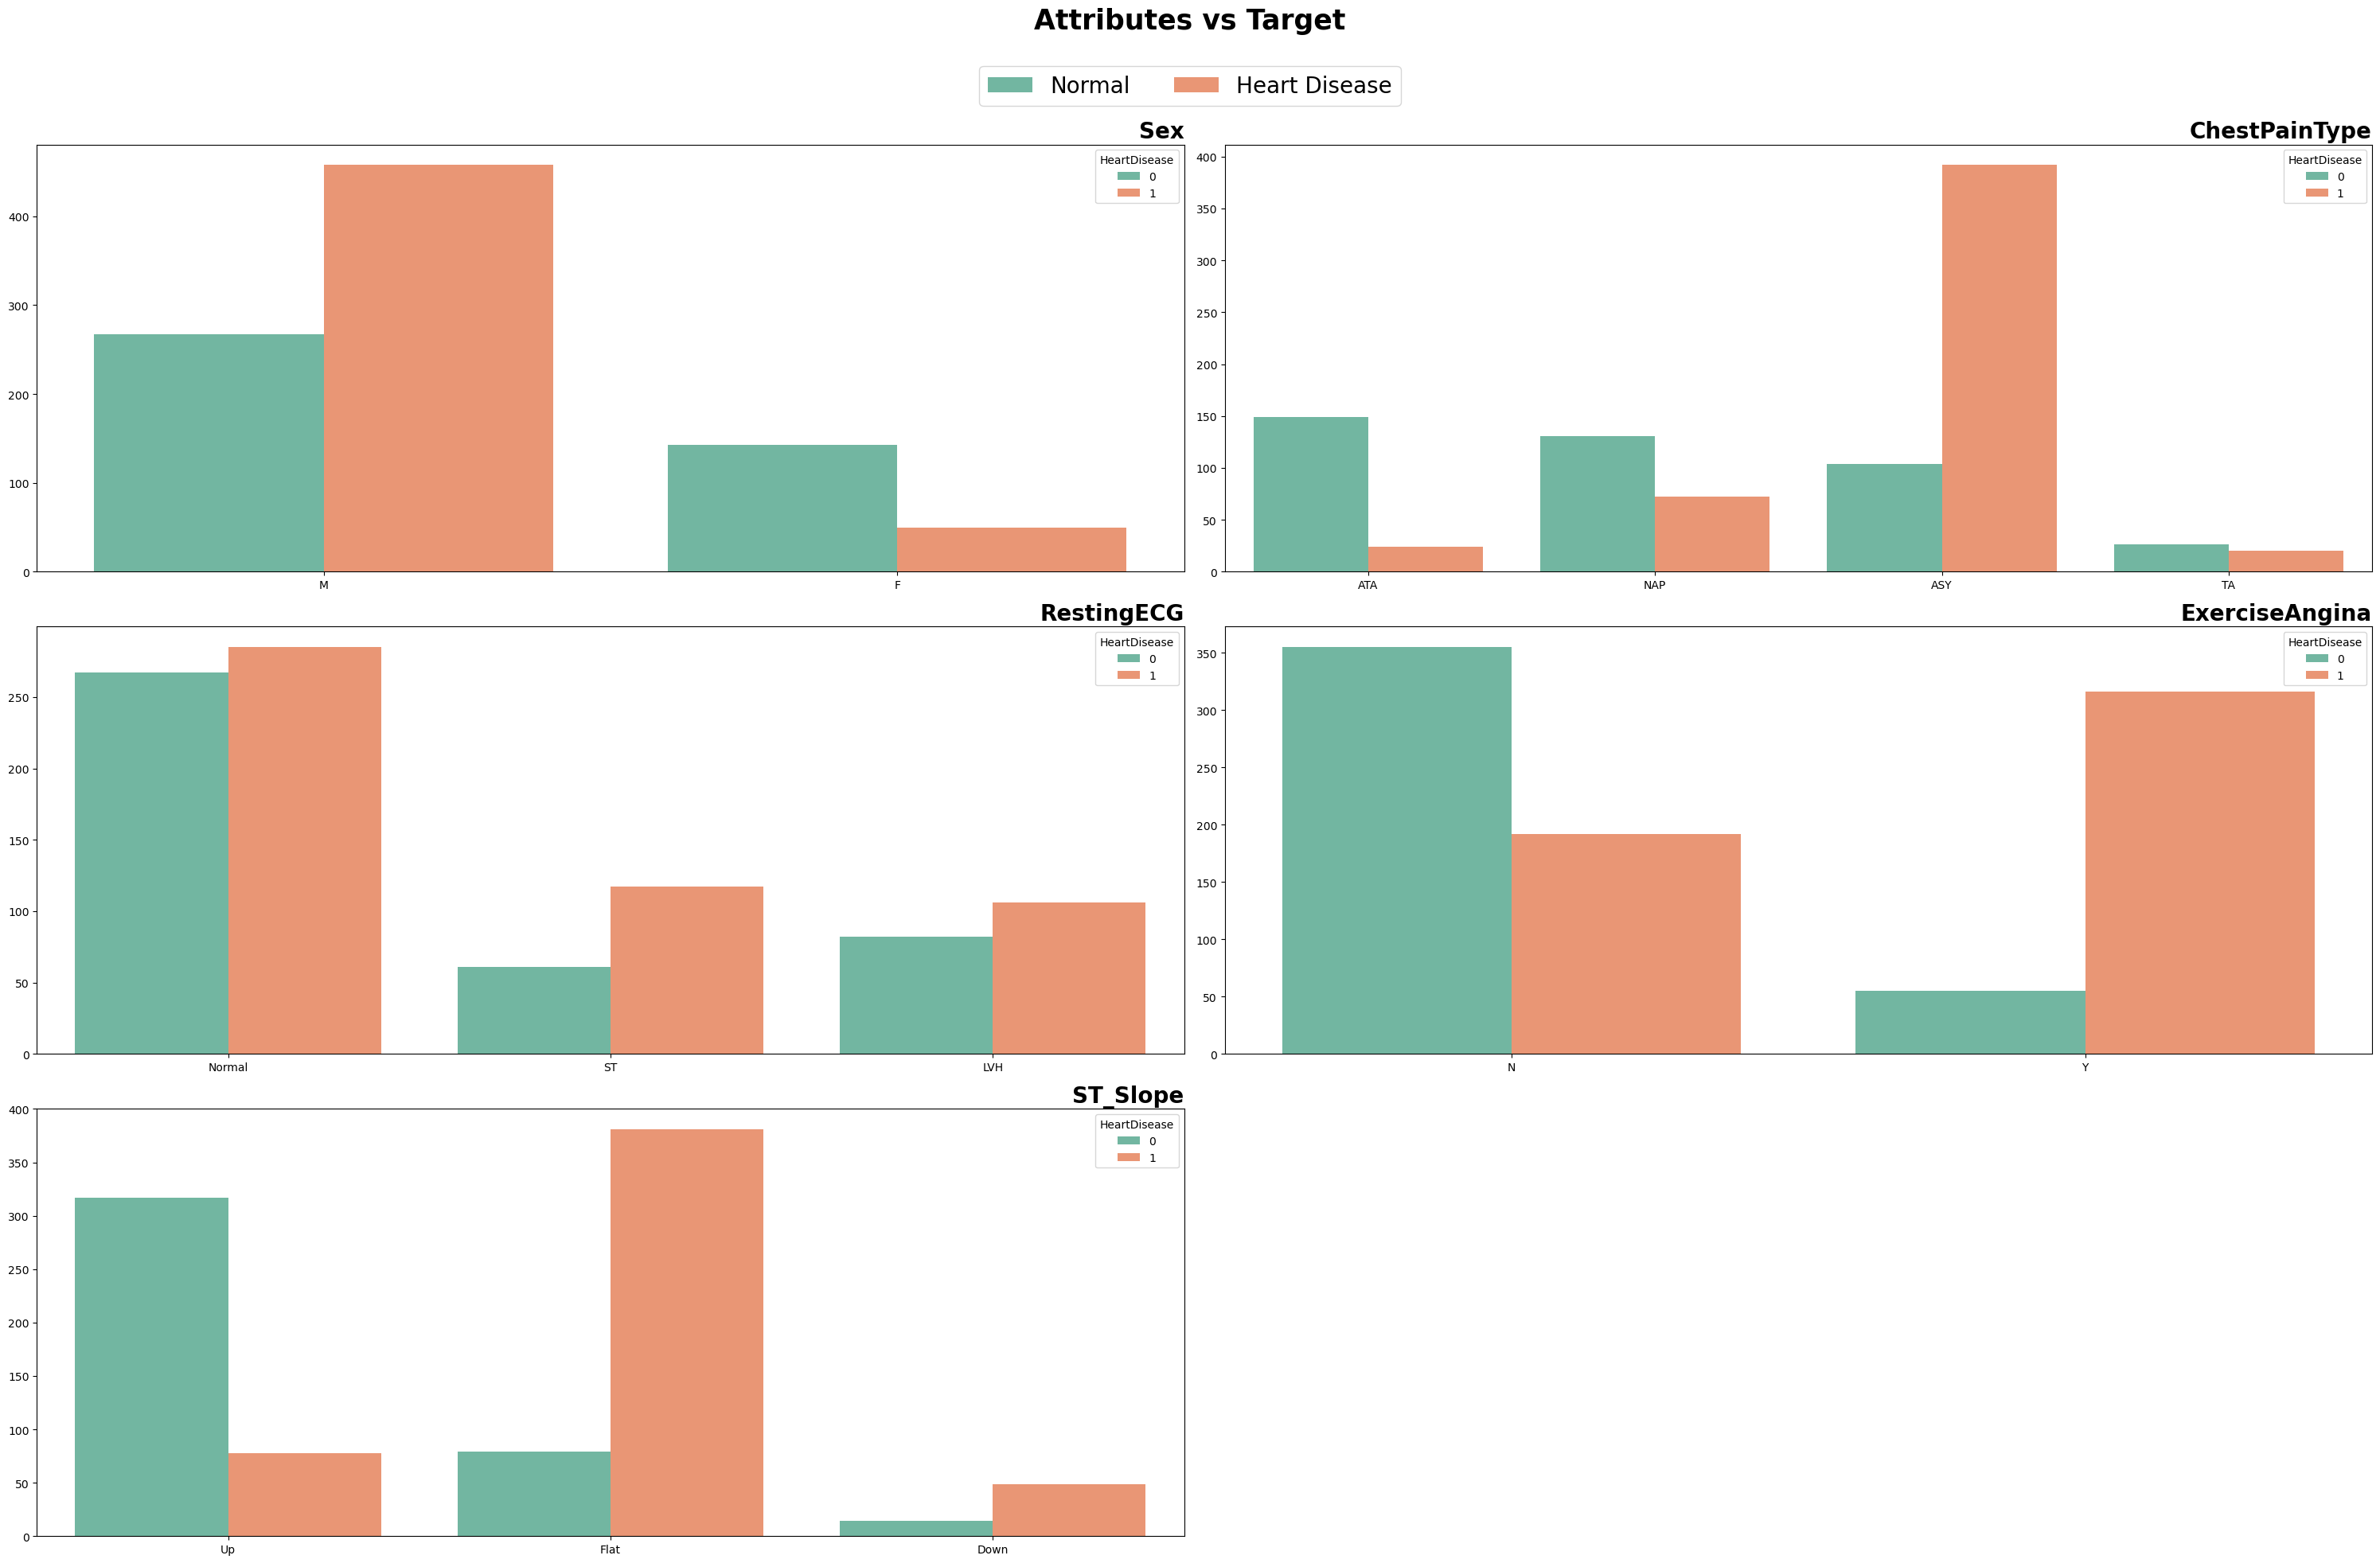

In [119]:
figsize = (30, 20)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(cat_df[:]):
    ax = plt.subplot(3,2, idx+1)
    sn.countplot(data=df, hue='HeartDisease', fill=True, x=col, palette='Set2')
            
    ax.set_title(f'{col}', loc='right', weight='bold', fontsize=20)
    ax.set_ylabel('')
    ax.set_xlabel('')

fig.suptitle('Attributes vs Target\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend(['Normal','Heart Disease'], loc='upper center', bbox_to_anchor=(0.5, 0.95), fontsize=20, ncol=2)
plt.tight_layout()
plt.show()

**Noticeable Patterns:**
- People with *ASY ChestPainType* are *more inclined* to have heart disease.
- People *with ExerciseAngina* are *more inclined* to have heart disease.
- People with *Flat ST_Slope* are *more inclined* to have heart disease. Conversely, people with *upsloping ST_Slope* are *less inclined* to have heart disease.

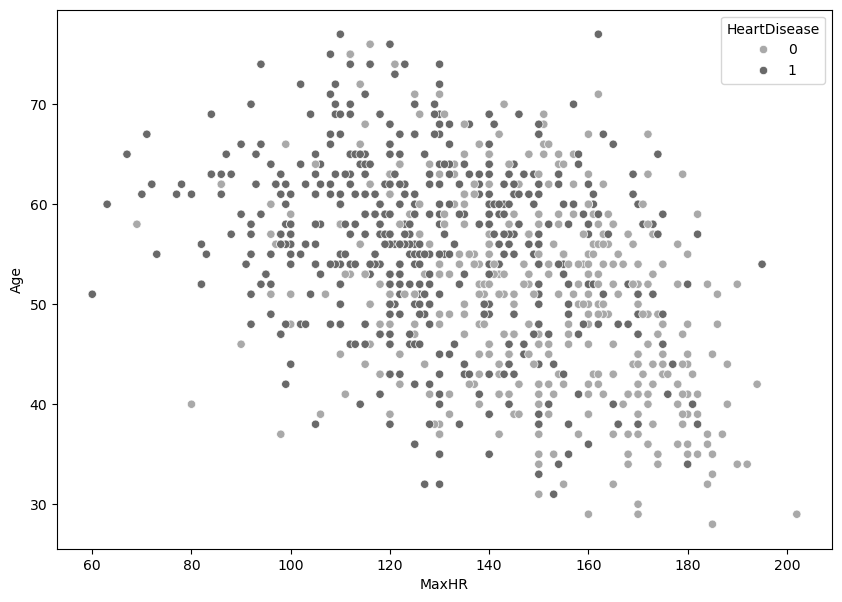

In [120]:
plt.figure(figsize=(10,7))
sn.scatterplot(x='MaxHR', y='Age', data=df, hue='HeartDisease', palette=['darkgray','dimgray'])
plt.show()

- We used a scatterplot to determine how the heart rate and age of the person are correlated with the likelihood of having a heart disease.
- In the earlier graph, it appeared that individuals with higher heart rates were more inclined to have heart disease. However, upon closer examination using the scatterplot, the data suggests that, with increasing age (particularly when they exceed the age of 50), individuals that has a higher likelihood of having heart disease tend to have lower heart rate.

# Step 5: Model Building